# Proyek Akhir: Menyelesaikan Permasalahan Students Performance


- **Nama:** Muhammad Fery Syahputra
- **Email:** a009ybm322@devacademy.id
- **ID Dicoding:** a009ybm322

## Persiapan

### Menyiapkan library yang dibutuhkan
Pada tahap awal, berbagai library penting diimpor untuk mendukung analisis data dan pemodelan machine learning. pandas dan numpy digunakan untuk manipulasi dan pengolahan data, sedangkan matplotlib dan seaborn berfungsi untuk visualisasi data agar insight dapat lebih mudah dipahami. Penanganan data yang hilang dilakukan dengan menggunakan KNNImputer dari scikit-learn, dan pengubahan data kategorikal menjadi numerik menggunakan LabelEncoder untuk kebutuhan pemrosesan oleh model machine learning. Selain itu, beberapa package pendukung juga diinstal, seperti imbalanced-learn untuk mengatasi ketidakseimbangan kelas, tqdm untuk menampilkan progress bar selama proses komputasi, serta versi spesifik scikit-learn yang dipilih demi kestabilan dan kompatibilitas kode selama pengembangan.

In [14]:
import kagglehub
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
!pip install imbalanced-learn==0.10.1
!pip install tqdm 
!pip install scikit-learn==1.2.2 

import warnings
warnings.filterwarnings("ignore")

#### Cek Versi library yang sudah didownload
Pada tahap ini, dilakukan pengecekan versi library scikit-learn yang telah terpasang untuk memastikan kesesuaian dan kompatibilitas dengan kode yang digunakan dalam proyek. Pengecekan versi ini penting agar proses pengembangan dan eksekusi model machine learning dapat berjalan dengan stabil sesuai dengan versi library yang didukung.

In [15]:
import sklearn
print(sklearn.__version__)


1.2.2


In [16]:
import imblearn
print(imblearn.__version__)


0.10.1


### Menyiapkan data yang akan digunakan
Dataset employee_data.csv diunduh dari repositori GitHub menggunakan perintah wget untuk memastikan data tersedia secara lokal dalam direktori kerja saat ini. Nama file yang telah diunduh disimpan sebagai variabel untuk memudahkan akses dan pengelolaan. Selanjutnya, path lengkap menuju file tersebut diperoleh dengan menggunakan fungsi os.path.abspath(), yang membantu dalam memastikan lokasi file saat ini di sistem file sehingga dapat digunakan secara tepat pada proses selanjutnya dalam analisis data.

In [17]:
# Download dataset employee_data.csv dari github
!wget https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

# Nama file yang diunduh
filename = "data.csv"

# Path lengkap ke file tersebut di direktori kerja saat ini
full_path = os.path.abspath(filename)
print("Path lengkap file:", full_path)

--2025-06-18 21:26:38--  https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.csv.1’

data.csv.1              [ <=>                ] 713.89K  --.-KB/s    in 0.1s    

2025-06-18 21:26:38 (5.43 MB/s) - ‘data.csv.1’ saved [731019]

Path lengkap file: /kaggle/working/data.csv


#### Menampilkan 5 data teratas

In [18]:
df_raw = pd.read_csv('/kaggle/input/students-performence/data.csv', sep=';')
df_raw.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding
Tahap Data Understanding dimulai dengan eksplorasi awal terhadap dataset yang sudah diperoleh untuk mengenal struktur, tipe data, dan kualitas data. Langkah ini mencakup pemeriksaan jumlah baris dan kolom, jenis data setiap fitur, nilai yang hilang atau tidak valid, serta distribusi data pada masing-masing kolom. Selain itu, pemahaman terhadap konteks dan makna kolom-kolom data sangat penting agar analisis berikutnya dapat dilakukan secara tepat dan relevan dengan tujuan proyek. Proses ini menjadi pondasi untuk tahap-tahap selanjutnya dalam data preparation dan modeling.

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Perintah df_raw.info() digunakan untuk menampilkan ringkasan informasi dasar mengenai dataset yang dimuat dalam variabel df_raw. Outputnya memperlihatkan bahwa dataset terdiri dari 4424 baris dan 37 kolom. Tabel tersebut memuat nama-nama kolom, jumlah nilai yang tidak kosong (non-null) pada masing-masing kolom, serta tipe data dari tiap kolom, seperti int64, float64, dan object. Tidak ditemukan nilai yang hilang (null) pada kolon-kolom tersebut, menunjukkan data lengkap dan siap untuk proses analisis lebih lanjut. Informasi ini sangat penting untuk memahami struktur data awal serta kesiapan data sebelum dilakukan tahap data cleaning atau transformasi.

#### Statistik Deskriptif


In [20]:
df_raw.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Perintah df_raw.describe(include="all") digunakan untuk menampilkan ringkasan statistik deskriptif dari seluruh kolom dalam dataset, baik numerik maupun kategorikal. Output mencakup berbagai metrik seperti jumlah data (count), nilai unik (unique), nilai yang paling sering muncul (top dan freq), serta ukuran statistik seperti rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil (25%, 50%, 75%), dan nilai maksimum (max). Informasi ini memberikan gambaran menyeluruh mengenai distribusi dan karakteristik data pada setiap kolom, yang sangat berguna untuk memahami sebaran data, mendeteksi anomali, dan merencanakan langkah analisis selanjutnya.

In [21]:
# Melihat nilai unik di kolom 'Status' beserta jumlah kemunculannya
unique_values = df_raw['Status'].value_counts(dropna=False)
print("Unique values dan jumlah pada kolom 'Status':")
print(unique_values)

Unique values dan jumlah pada kolom 'Status':
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


#### Karena saya hanya ingin 2 kelas,Data kelas enrolled saya drop
Fungsi value_counts(dropna=False) digunakan untuk menghitung dan menampilkan jumlah kemunculan setiap nilai unik dalam kolom Status pada DataFrame df_raw. Hasilnya terdapat tiga kelas: "Graduate" sebanyak 2209 data, "Dropout" sebanyak 1421 data, dan "Enrolled" sebanyak 794 data. Berdasarkan fokus analisis, kelas "Enrolled" yang berisi mahasiswa yang sedang menjalani perkuliahan diputuskan untuk dihapus agar analisis difokuskan hanya pada dua kelas utama, yakni "Graduate" dan "Dropout".

In [22]:
# Menghapus baris dengan Status == 'Enrolled'
df_filtered = df_raw[df_raw['Status'] != 'Enrolled'].reset_index(drop=True)

# Menampilkan info data setelah filtering
print(f"Sebelum filtering, jumlah data: {len(df_raw)}")
print(f"Setelah filtering (menghapus 'Enrolled'), jumlah data: {len(df_filtered)}")

# Jika ingin menimpa df asli, gunakan:
df_raw = df_filtered

Sebelum filtering, jumlah data: 4424
Setelah filtering (menghapus 'Enrolled'), jumlah data: 3630


In [23]:
# Melihat nilai unik di kolom 'Status' beserta jumlah kemunculannya
unique_values = df_raw['Status'].value_counts(dropna=False)
print("Unique values dan jumlah pada kolom 'Status':")
print(unique_values)

Unique values dan jumlah pada kolom 'Status':
Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64


## Data Preparation / Preprocessing

Tahap Data Preparation atau Preprocessing dilakukan untuk mempersiapkan data agar siap digunakan dalam analisis dan pemodelan. Proses ini meliputi pembersihan data, penghilangan atau imputasi nilai yang hilang, transformasi data sesuai kebutuhan, serta penghapusan data atau fitur yang tidak relevan. Selain itu, tahap ini juga dapat mencakup encoding kategori, normalisasi atau standarisasi data numerik, dan pembagian data menjadi subset seperti data pelatihan dan pengujian. Tujuan utama dari preprocessing adalah memastikan data memiliki kualitas dan format yang optimal untuk menghasilkan model yang akurat dan handal.

In [24]:
df_raw.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Proses pengecekan nilai hilang dilakukan dengan menggunakan fungsi df_raw.isna().sum() yang menghitung total nilai kosong pada setiap kolom di DataFrame df_raw. Hasil output menunjukkan bahwa tidak ada nilai yang hilang (missing values) di semua kolom dataset, artinya data sudah dalam kondisi bersih dan lengkap sehingga dapat langsung digunakan untuk tahap visualisasi dan analisis selanjutnya tanpa perlu proses imputasi atau pembersihan tambahan.

#### Visualisasi Data Menggunakan Pertanyaan Bisnis
Visualisasi data dilakukan dengan menggunakan pendekatan berbasis pertanyaan bisnis untuk menjawab isu atau tujuan utama proyek. Melalui visualisasi, informasi penting mengenai performa mahasiswa, faktor risiko dropout, serta hubungan antar variabel dapat ditampilkan secara intuitif dan mudah dipahami. Grafik, diagram, serta dashboard interaktif digunakan untuk menampilkan tren, distribusi, dan korelasi data, sehingga dapat mengungkap insight yang mendukung pengambilan keputusan bisnis. Pendekatan ini memastikan bahwa proses visualisasi tidak hanya bersifat informatif, tetapi juga terfokus pada kebutuhan dan prioritas stakeholder terkait bisnis atau institusi pendidikan.

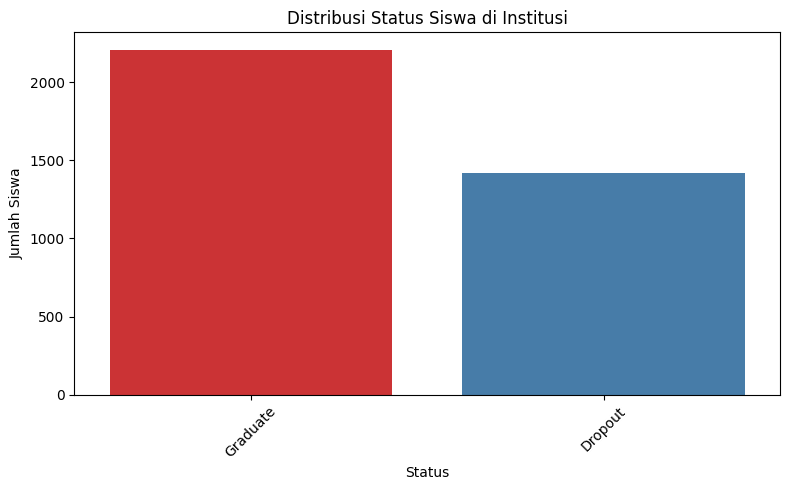

In [25]:
# Berapa distribusi status siswa (target) saat ini? (Dropout vs Enrolled vs Lainnya)
plt.figure(figsize=(8,5))
sns.countplot(data=df_raw, x='Status', order=df_raw['Status'].value_counts().index, palette='Set1')
plt.title('Distribusi Status Siswa di Institusi')
plt.xlabel('Status')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menggunakan countplot untuk memperlihatkan distribusi status siswa berdasarkan kolom Status pada dataset. Grafik batang ini menampilkan tiga kategori status siswa yaitu "Graduate," "Dropout," dan "Enrolled." Dari visualisasi tersebut dapat dilihat jumlah siswa yang telah lulus (Graduate) lebih banyak dibandingkan dengan siswa yang putus studi (Dropout). Visualisasi ini menjadi titik awal yang penting untuk memahami proporsi target kelas dalam dataset, sekaligus membantu menentukan fokus analisis dan strategi tindak lanjut dalam pengelolaan risiko dropout di institusi pendidikan.

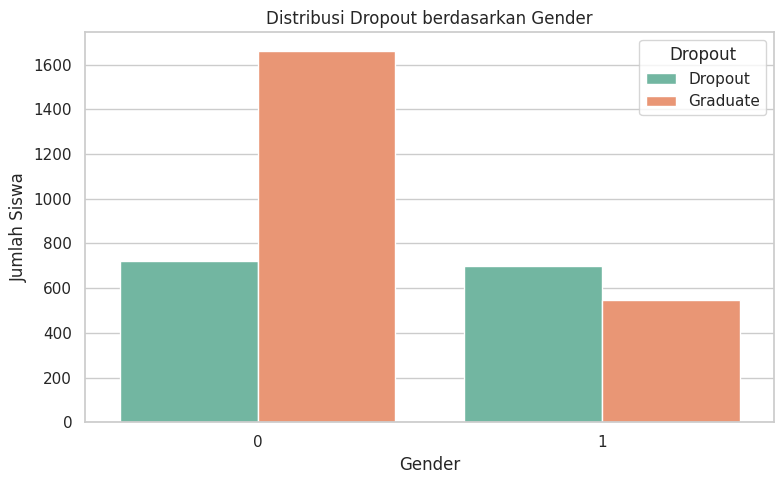

In [26]:
# Mengatur style seaborn
sns.set(style="whitegrid")

# Visualisasi Distribusi Status Dropout berdasarkan Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df_raw, x='Gender', hue='Status', palette='Set2')
plt.title('Distribusi Dropout berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Dropout')
plt.tight_layout()
plt.show()

Visualisasi ini menggunakan countplot untuk menampilkan distribusi status dropout dan graduate siswa berdasarkan variabel Gender. Grafik batang ini memperlihatkan perbandingan jumlah siswa laki-laki dan perempuan pada dua status tersebut. Dari hasil visualisasi dapat dilihat bahwa jumlah mahasiswa yang lulus (Graduate) jauh lebih tinggi pada kelompok gender perempuan dibandingkan laki-laki, sedangkan jumlah mahasiswa yang dropout lebih banyak pada kelompok laki-laki dibandingkan perempuan. Analisis ini menegaskan adanya perbedaan signifikan dalam risiko dropout berdasarkan gender, dimana mahasiswa laki-laki cenderung memiliki risiko dropout lebih tinggi. Insight ini sangat penting untuk memahami peran faktor gender dalam dinamika kelulusan dan putus studi, sehingga institusi dapat merancang strategi intervensi yang lebih terfokus dan efektif dalam menurunkan angka dropout terutama pada kelompok laki-laki.

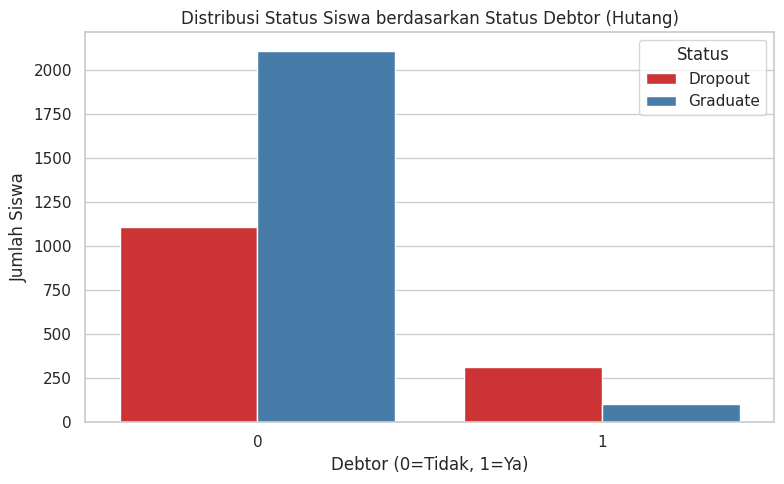

In [27]:
# Bagaimana tingkat hutang (Debtor) berasosiasi dengan Status siswa?
plt.figure(figsize=(8,5))
sns.countplot(data=df_raw, x='Debtor', hue='Status', palette='Set1')
plt.title('Distribusi Status Siswa berdasarkan Status Debtor (Hutang)')
plt.xlabel('Debtor (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Visualisasi ini menggunakan countplot untuk menampilkan distribusi status siswa (Dropout dan Graduate) berdasarkan status debtor, yaitu apakah siswa memiliki hutang atau tidak (0=Tidak, 1=Ya). Grafik batang memperlihatkan perbandingan jumlah siswa dengan dan tanpa hutang yang tersebar pada dua status tersebut. Dari visualisasi dapat dilihat bahwa mayoritas siswa yang tidak memiliki hutang berhasil lulus (Graduate) dengan jumlah jauh lebih banyak dibandingkan yang dropout. Sebaliknya, pada kelompok siswa yang memiliki hutang, jumlah siswa yang dropout cukup signifikan, walaupun jumlah siswa yang lulus lebih sedikit dibanding tanpa hutang.

Analisis ini mengindikasikan adanya korelasi yang kuat antara status hutang siswa dengan risiko dropout. Siswa yang terbebani hutang cenderung berisiko lebih tinggi untuk putus studi dibandingkan yang tidak memiliki hutang. Insight ini sangat berguna bagi institusi untuk merancang intervensi dan kebijakan keuangan yang dapat membantu mengurangi risiko dropout, misalnya dengan memberikan dukungan keuangan atau skema pembayaran yang lebih fleksibel kepada siswa yang berhutang.

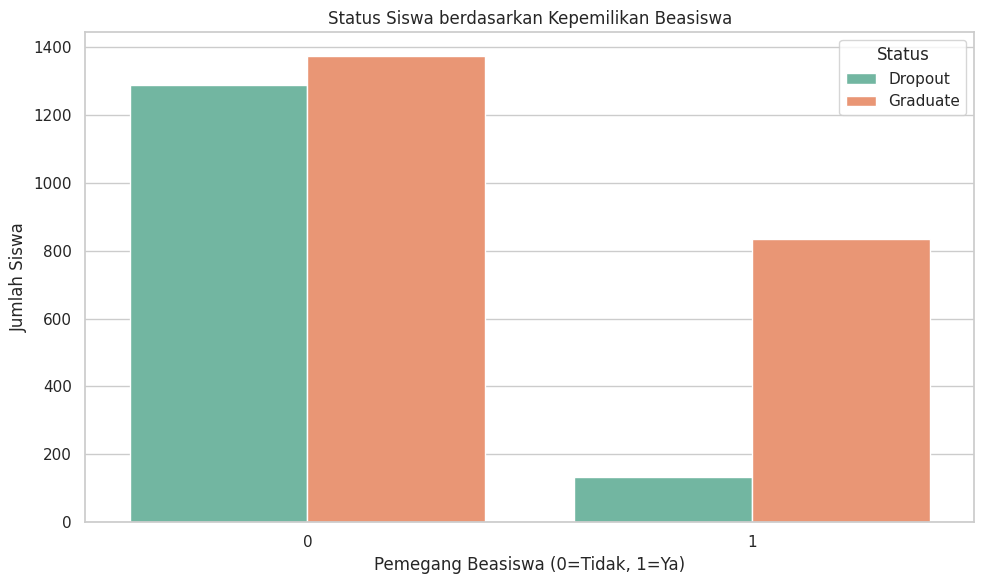

In [28]:
# Status Siswa berdasarkan Kepemilikan Beasiswa
plt.figure(figsize=(10,6))
sns.countplot(data=df_raw, x='Scholarship_holder', hue='Status', palette='Set2')
plt.title('Status Siswa berdasarkan Kepemilikan Beasiswa')
plt.xlabel('Pemegang Beasiswa (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Visualisasi ini menggunakan countplot untuk menampilkan distribusi status siswa (Dropout dan Graduate) berdasarkan kepemilikan beasiswa (0=Tidak, 1=Ya). Grafik batang memperlihatkan perbandingan jumlah siswa yang tidak memiliki beasiswa dan yang memiliki beasiswa pada dua status tersebut. Dari visualisasi dapat dilihat bahwa jumlah siswa yang tidak memiliki beasiswa baik yang lulus (Graduate) maupun yang dropout relatif seimbang, dengan sedikit lebih banyak siswa yang lulus. Sedangkan pada kelompok siswa yang memiliki beasiswa, jumlah siswa yang lulus jauh lebih banyak dibandingkan yang dropout.

Analisis ini menunjukkan bahwa kepemilikan beasiswa berasosiasi dengan peluang kelulusan yang lebih tinggi dan risiko putus studi yang lebih rendah. Hal ini mengindikasikan bahwa dukungan finansial melalui beasiswa dapat berperan penting dalam membantu siswa agar bisa menyelesaikan pendidikan mereka. Oleh karena itu, institusi pendidikan dapat mempertimbangkan penguatan program beasiswa sebagai strategi efektif untuk menurunkan angka dropout dan meningkatkan kelulusan siswa.

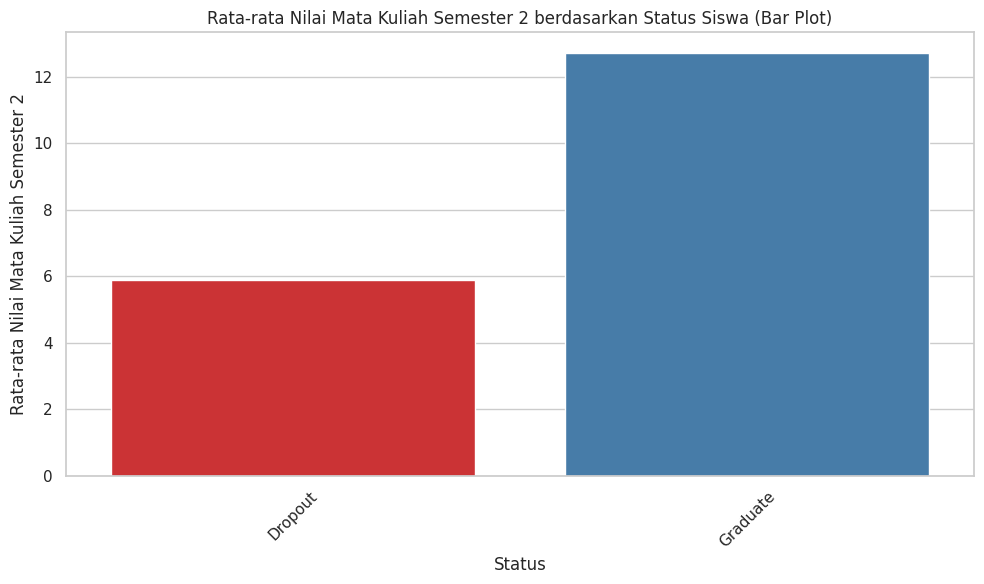

In [29]:
# Bar plot rata-rata nilai per Status
plt.figure(figsize=(10,6))
mean_grades = df_raw.groupby('Status')['Curricular_units_2nd_sem_grade'].mean().reset_index()
sns.barplot(x='Status', y='Curricular_units_2nd_sem_grade', data=mean_grades, palette='Set1')
plt.title('Rata-rata Nilai Mata Kuliah Semester 2 berdasarkan Status Siswa (Bar Plot)')
plt.xlabel('Status')
plt.ylabel('Rata-rata Nilai Mata Kuliah Semester 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menampilkan bar plot yang menggambarkan perbandingan rata-rata nilai mata kuliah semester 2 antara dua kelompok siswa berdasarkan status mereka, yaitu Dropout dan Graduate. Data diolah dengan cara mengelompokkan nilai rata-rata dari kolom Curricular_units_2nd_sem_grade berdasarkan status siswa, kemudian ditampilkan dalam bentuk grafik batang.

Dari grafik dapat dianalisis bahwa rata-rata nilai mata kuliah semester 2 pada kelompok siswa yang lulus (Graduate) jauh lebih tinggi dibandingkan dengan kelompok siswa yang putus studi (Dropout). Hal ini menunjukkan bahwa performa akademik yang baik, yang direfleksikan dari nilai rata-rata yang tinggi, berasosiasi kuat dengan keberhasilan mahasiswa untuk menyelesaikan studi mereka. Sebaliknya, nilai yang lebih rendah pada kelompok Dropout mengindikasikan potensi faktor akademik sebagai determinan utama risiko putus studi.

Insight ini penting bagi institusi pendidikan untuk memfokuskan perhatian dan intervensi pada peningkatan kualitas belajar dan dukungan akademik bagi mahasiswa yang berisiko menurun dalam performa nilai agar dapat mengurangi tingkat dropout.

In [30]:
## Download Dataset untuk keperluan visualisasi 
df_raw.to_csv('student_performence_clean_viz.csv', index=False)

In [31]:
# Meninisialisasikan menjadi df
df = df_raw

#### Transformasi Variabel Status Siswa menjadi Format Biner

Dalam tahap ini, dilakukan transformasi pada kolom Status yang sebelumnya berisi nilai kategori seperti "Dropout", "Graduate", atau status lain, menjadi format biner numerik. Dengan menggunakan fungsi apply dan lambda, setiap nilai di kolom Status diubah menjadi angka 1 jika mengandung kata "dropout" (dalam huruf kecil untuk memastikan konsistensi) yang menandakan siswa putus studi, dan menjadi angka 0 jika bukan dropout (misalnya lulus atau status lainnya). Transformasi ini penting sebagai langkah persiapan data agar dapat digunakan dalam analisis statistik atau pemodelan machine learning yang biasanya memerlukan variabel target dalam format numerik biner.

In [33]:
df['Status'] = df['Status'].apply(lambda x: 1 if 'dropout' in str(x).lower() else 0)

#### Pemilihan feature
Pemilihan fitur merupakan tahap penting dalam pengolahan data untuk model machine learning, yang bertujuan memilih subset fitur terbaik sehingga model menjadi lebih efisien dan akurat. Pada kode ini, digunakan metode RandomForestClassifier untuk menilai importance dari setiap fitur numerik terhadap variabel target yaitu Status siswa.

Langkah pertama adalah melatih model Random Forest pada keseluruhan fitur numerik. Dengan menggunakan SelectFromModel, dipilih secara otomatis 10 fitur terbaik yang memberikan kontribusi paling signifikan dalam memprediksi status siswa. Fitur-fitur terpilih ini kemudian digunakan untuk mempersiapkan data sebelum membagi dataset menjadi data latih dan data uji secara stratifikasi agar distribusi target tetap terjaga.

Dengan pendekatan ini, proses modeling dapat difokuskan pada fitur yang paling relevan sehingga performa model berpotensi meningkat dan mengurangi risiko overfitting akibat fitur yang tidak penting.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np

def select_top_k_features(X, y, top_k=10, random_state=42):
    """
    Memilih 10 fitur terbaik berdasarkan importance menggunakan RandomForestClassifier.

    Args:
        X (DataFrame): Data fitur.
        y (Series): Target variabel.
        top_k (int): Jumlah fitur terbaik yang dipilih.
        random_state (int): Seed random untuk reproducibility.

    Returns:
        selected_features (list): Daftar nama fitur yang terpilih.
    """
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X, y)
    selector = SelectFromModel(rf, max_features=top_k, prefit=True, threshold=-np.inf)
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask].tolist()
    return selected_features

def split_data_with_feature_selection(df, target_column='Status', test_size=0.2, random_state=42, top_k=10):
    """
    Memilih fitur terbaik berdasarkan target, kemudian membagi dataset menjadi train dan test.

    Args:
        df (DataFrame): Dataset lengkap.
        target_column (str): Nama kolom target.
        test_size (float): Proporsi data test.
        random_state (int): Seed random untuk reproducibility.
        top_k (int): Jumlah fitur terbaik yang dipilih.

    Returns:
        X_train, X_test, y_train, y_test (DataFrame/Series): Data train dan test hasil split.
        selected_features (list): Daftar fitur terbaik yang dipilih.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Menghilangkan kolom non-numerik untuk seleksi berbasis RF (alternatif: encoding jika perlu)
    X_numeric = X.select_dtypes(include=[np.number])

    # Pilih 10 fitur terbaik berdasarkan RandomForest
    selected_features = select_top_k_features(X_numeric, y, top_k=top_k, random_state=random_state)

    # Gunakan fitur terbaik untuk split data
    X_selected = X[selected_features]

    # Split data dengan stratifikasi
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=test_size, stratify=y, random_state=random_state
    )

    return X_train, X_test, y_train, y_test, selected_features



Fungsi select_top_k_features menggunakan RandomForestClassifier untuk memilih fitur terbaik berdasarkan feature importance dengan target memilih 10 fitur teratas. Fungsi ini mengembalikan daftar nama fitur yang dipilih.

Selanjutnya, fungsi split_data_with_feature_selection mengaplikasikan pemilihan fitur terbaik tersebut pada dataset dengan menghilangkan kolom target lalu memilih fitur numerik, memilih 10 fitur terbaik menggunakan fungsi sebelumnya, kemudian membagi data menjadi data latih dan data uji dengan stratifikasi berdasarkan target. Fungsi ini mengembalikan data latih dan uji beserta daftar fitur terbaik terpilih.

In [35]:
# Penggunaan fungsi pada dataset df
X_train, X_test, y_train, y_test, selected_features = split_data_with_feature_selection(df, target_column='Status', test_size=0.2, random_state=42, top_k=10)

print("Fitur terbaik yang dipilih:", selected_features)
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)

Fitur terbaik yang dipilih: ['Course', 'Admission_grade', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']
Bentuk X_train: (2904, 10)
Bentuk X_test: (726, 10)


### Pengecekan Distribusi Kelas dan Ketidakseimbangan Data (Class Imbalance Check)
Pengecekan distribusi kelas pada dataset merupakan tahap penting sebelum melakukan pemodelan machine learning, terutama untuk masalah klasifikasi. Fungsi check_imbalance yang dibuat bertujuan untuk menghitung proporsi masing-masing kelas dalam variabel target dan mengevaluasi apakah data mengalami ketidakseimbangan kelas (imbalanced data).

Pada fungsi ini, proporsi setiap kelas dihitung menggunakan value_counts(normalize=True). Kemudian, fungsi membandingkan proporsi kelas minoritas dengan ambang batas (threshold) yang ditentukan, di mana kelas yang memiliki proporsi lebih kecil dari threshold dianggap sebagai minoritas dan menandakan dataset tidak seimbang.

In [36]:
def check_imbalance(y, threshold=0.5):
    """
    Fungsi untuk cek distribusi kelas dan apakah terdapat ketidakseimbangan.
    
    Parameter:
    - y : target array/series
    - threshold : proporsi minimum kelas minoritas dibawah threshold dianggap imbalance (default 0.1 atau 10%)
    
    Output:
    - print distribusi kelas dan apakah imbalance atau tidak
    """
    value_counts = y.value_counts(normalize=True)
    print("Distribusi kelas (proporsi):")
    print(value_counts)
    
    # Cek apakah ada kelas dengan proporsi dibawah threshold
    if any(value_counts < threshold):
        print("\n⚠️ Dataset ini IMBALANCED. Ada kelas minoritas dengan proporsi kurang dari", threshold)
    else:
        print("\n✅ Dataset ini cukup SEIMBANG.")
        
print(check_imbalance(y_train))
print(check_imbalance(y_test))


Distribusi kelas (proporsi):
Status
0    0.608471
1    0.391529
Name: proportion, dtype: float64

⚠️ Dataset ini IMBALANCED. Ada kelas minoritas dengan proporsi kurang dari 0.5
None
Distribusi kelas (proporsi):
Status
0    0.608815
1    0.391185
Name: proportion, dtype: float64

⚠️ Dataset ini IMBALANCED. Ada kelas minoritas dengan proporsi kurang dari 0.5
None


Output fungsi berupa distribusi proporsi kelas serta pesan yang menginformasikan apakah dataset tersebut imbalanced atau cukup seimbang berdasarkan threshold yang diterapkan. Hasil eksekusi menunjukkan bahwa dataset ini mengalami ketidakseimbangan kelas, dengan kelas minoritas memiliki proporsi kurang dari threshold 0.5, sehingga perlakuan khusus seperti teknik penanganan imbalance diperlukan untuk meningkatkan kualitas model.

### Pembuatan Pipeline Preprocessing dengan SMOTE, PCA, dan Random Forest untuk Klasifikasi

pipeline yang dibuat bertujuan untuk membangun alur kerja pemodelan machine learning yang komprehensif, mulai dari tahap praproses data hingga klasifikasi akhir. Fungsi create_pipeline_rf memadukan beberapa langkah penting dalam satu pipeline terintegrasi agar mudah digunakan dan direproduksi.Pada tahap awal, data numerik di-scale menggunakan StandardScaler, sedangkan fitur kategorikal di-encode menggunakan OneHotEncoder agar data siap ditangani model. Preprocessor ini dikemas dalam ColumnTransformer yang menangani fitur berbeda secara tepat sesuai tipenya.

Setelah preprocessing, pipeline mengaplikasikan SMOTE (Synthetic Minority Over-sampling Technique) untuk mengatasi masalah ketidakseimbangan kelas (class imbalance) dengan cara menambah data sintetis pada kelas minoritas, sehingga model dapat belajar dari distribusi data yang lebih seimbang.Tahap berikutnya adalah reduksi dimensi menggunakan PCA (Principal Component Analysis) dengan jumlah komponen yang dapat diatur (n_components), guna menangkap variabilitas terbesar dari fitur dan mengurangi kompleksitas model.

Terakhir, model klasifikasi yang digunakan adalah RandomForestClassifier, yang kuat dalam menangani data dengan fitur numerik dan kategorikal serta memberikan performa baik untuk masalah klasifikasi. Pipeline ini dirancang agar modular dan fleksibel dengan parameter seperti daftar fitur numerik, fitur kategorikal, jumlah komponen PCA, dan random state yang bisa disesuaikan. Implementasi pipeline ini memungkinkan proses training dan evaluasi yang efisien, sekaligus membantu menangani masalah imbalance dan kompleksitas fitur dengan teknik yang tepat dalam satu kesatuan alur.

In [37]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

def create_pipeline_rf(num_features, cat_features, n_components=5, random_state=42):
    """
    Membuat pipeline preprocessing + SMOTE + PCA + Random Forest.

    Args:
        num_features (list of str): Daftar nama kolom numerik.
        cat_features (list of str): Daftar nama kolom kategorikal.
        n_components (int): Jumlah komponen PCA.
        random_state (int): Seed random.

    Returns:
        pipeline (ImbPipeline): Pipeline yang lengkap.
    """
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=random_state)),
        ('pca', PCA(n_components=n_components, random_state=random_state)),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])

    return pipeline


#Tentukan kolom numerik dan kategorikal dari X_train
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

#Buat pipeline
pipeline = create_pipeline_rf(num_features, cat_features, n_components=5, random_state=42)


## Modeling

#### Pelatihan Model Random Forest dengan Optimasi Hyperparameter Menggunakan RandomizedSearchCV
Fungsi train_model_with_random_search_rf bertujuan melakukan pelatihan model klasifikasi menggunakan pipeline yang sudah mencakup preprocessing data, penyeimbangan kelas dengan SMOTE, reduksi dimensi dengan PCA, serta Random Forest sebagai algoritma prediksi.

Langkah utama dalam fungsi ini adalah penerapan RandomizedSearchCV, metode pencarian hyperparameter secara acak dalam ruang parameter yang diberikan untuk menemukan kombinasi nilai hyperparameter terbaik yang memaksimalkan performa model. Pendekatan ini lebih efisien dibanding grid search ketika ruang parameter cukup besar. Parameter yang di-tuning meliputi jumlah komponen PCA (n_components), serta beberapa hyperparameter penting pada Random Forest seperti jumlah estimator (n_estimators), kedalaman maksimal pohon (max_depth), dan parameter pengaturan pembelahan serta pengambilan sampel (min_samples_split, min_samples_leaf, bootstrap).

Proses cross-validation menggunakan StratifiedKFold, yaitu K-fold yang mempertahankan proporsi kelas target agar validasi melibatkan distribusi kelas yang representatif, penting pada data dengan ketidakseimbangan kelas. Metode evaluasi yang digunakan adalah skor AUC ROC (roc_auc), yang umum dipakai untuk mengukur performa model klasifikasi terutama pada kasus imbalance karena mempertimbangkan trade-off antara True Positive Rate dan False Positive Rate.

Fungsi mengabaikan peringatan UserWarning agar output lebih bersih, tetapi tetap harus hati-hati terhadap warning lainnya. Setelah pelatihan, fungsi menampilkan kombinasi hyperparameter terbaik yang ditemukan. Dengan pipeline ini, proses training dan hyperparameter tuning menjadi terstruktur dan menyeluruh, mengoptimalkan model Random Forest yang diharapkan memiliki performa baik dalam klasifikasi data yang mungkin tidak seimbang dan dengan fitur berdimensi tinggi.

In [38]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import warnings

def train_model_with_random_search_rf(pipeline, X_train, y_train, random_state=42, n_iter=20):
    """
    Melakukan training model dengan RandomizedSearchCV untuk pipeline dengan RandomForestClassifier.

    Args:
        pipeline (ImbPipeline): Pipeline yang sudah dibuat (Preprocessing + SMOTE + PCA + RandomForestClassifier).
        X_train (DataFrame): Fitur train.
        y_train (Series): Target train.
        random_state (int): Seed random untuk reproducibility.
        n_iter (int): Jumlah iterasi random search.

    Returns:
        random_search (RandomizedSearchCV): Model hasil training terbaik.
    """
    # Matikan peringatan UserWarning agar output bersih, tapi tetap hati-hati dengan warning lain
    warnings.filterwarnings("ignore", category=UserWarning)

    # Rentang parameter untuk RandomizedSearchCV, nama parameter merujuk step pipeline
    param_dist = {
        'pca__n_components': [5, 7, 10, 15],
        'classifier__n_estimators': [100, 200, 300, 400],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__bootstrap': [True, False]
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    random_search = RandomizedSearchCV(
        pipeline, param_distributions=param_dist, n_iter=n_iter,
        scoring='roc_auc', cv=skf, verbose=2, n_jobs=-1, random_state=random_state
    )

    # Fit model menggunakan data train dan target train
    random_search.fit(X_train, y_train)

    print("Best parameters:", random_search.best_params_)

    return random_search

random_search = train_model_with_random_search_rf(pipeline, X_train, y_train, n_iter=20)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'pca__n_components': 7, 'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__bootstrap': True}


Output dari proses pelatihan menggunakan RandomizedSearchCV dengan 5 fold cross-validation pada 20 kombinasi hyperparameter random menghasilkan total 100 kali fitting model, dimana sistem melakukan pencarian kombinasi terbaik berdasarkan skor roc_auc. Hasil terbaik ditemukan pada konfigurasi dengan 7 komponen PCA, 300 estimator pada Random Forest, nilai minimum split sampel 5, minimum leaf sampel 4, kedalaman maksimum pohon 10, dan bootstrap diaktifkan, yang secara signifikan mengoptimalkan performa model klasifikasi.

## Evaluation
Evaluasi model dilakukan dengan menggunakan dataset pengujian untuk menilai performa model setelah proses pelatihan dan tuning hyperparameter dengan RandomizedSearchCV. Model terbaik (best estimator) digunakan untuk memprediksi label pada data pengujian dan menghitung berbagai metrik penting yang menggambarkan kualitas prediksi. Metrik utama yang dihitung adalah AUC ROC, yang mengukur kemampuan model dalam membedakan antara kelas positif dan negatif dengan nilai yang lebih tinggi menunjukkan performa pemisahan kelas yang lebih baik. Selain itu, dihitung juga akurasi yang menunjukkan proporsi prediksi yang benar terhadap keseluruhan data. Laporan klasifikasi memberikan detail precision (ketepatan prediksi per kelas), recall (kemampuan model menangkap seluruh kasus positif), dan F1-score (harmonik rata-rata precision dan recall) yang sangat berguna untuk memahami keseimbangan performa per kelas. Confusion matrix juga disajikan untuk mengilustrasikan jumlah prediksi benar dan salah dari kedua kelas, sehingga memudahkan identifikasi jenis kesalahan yang terjadi. Semua hasil evaluasi ini membantu memastikan bahwa model tidak hanya memiliki performa yang baik di data pelatihan, tetapi juga mampu mengeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya.

In [39]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

def evaluate_model_on_test(random_search_model, X_test, y_test):
    """
    Evaluasi model yang sudah dilatih pada data testing.
    
    Args:
        random_search_model: Model hasil RandomizedSearchCV.best_estimator_ atau RandomizedSearchCV langsung.
        X_test (DataFrame): Data fitur test.
        y_test (Series): Label test sebenarnya.

    Returns:
        dict: Hasil metrik evaluasi utama.
    """
    y_pred = random_search_model.predict(X_test)
    y_proba = random_search_model.predict_proba(X_test)[:, 1]

    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("=== Evaluation Results on Test Data ===")
    print(f"AUC ROC Score: {auc_roc:.4f}")
    print(f"Accuracy Score: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(conf_matrix)

    return {
        "auc_roc": auc_roc,
        "accuracy": accuracy,
        "classification_report": class_report,
        "confusion_matrix": conf_matrix
    }

best_model = random_search.best_estimator_

# Asumsikan Anda punya X_test, y_test
results = evaluate_model_on_test(best_model, X_test, y_test)


=== Evaluation Results on Test Data ===
AUC ROC Score: 0.9590
Accuracy Score: 0.9008
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       442
           1       0.88      0.86      0.87       284

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726

Confusion Matrix:
[[409  33]
 [ 39 245]]


Fungsi diatas melakukan evaluasi menyeluruh terhadap model klasifikasi yang telah dilatih menggunakan metode RandomizedSearchCV pada dataset uji. Fungsi menerima model terbaik hasil pencarian hyperparameter, serta data uji fitur dan label sebenarnya. Proses evaluasi mencakup prediksi kelas, prediksi probabilitas, serta perhitungan beberapa metrik penting seperti AUC ROC untuk mengukur kemampuan model membedakan kelas secara keseluruhan, akurasi yang menunjukkan persentase prediksi benar, dan laporan klasifikasi yang memberikan detail precision, recall, dan F1-score per kelas. Selain itu, fungsi juga menampilkan confusion matrix yang memetakan jumlah prediksi benar dan salah per kelas. Output evaluasi ini memberikan gambaran lengkap performa model pada data yang belum pernah dilihat sebelumnya, sehingga membantu dalam menilai efektivitas model untuk tugas klasifikasi yang dihadapi.

Output evaluasi model pada data uji menunjukkan performa yang sangat baik, dengan skor AUC ROC mencapai 0.9590 yang menandakan kemampuan model dalam membedakan kelas dengan sangat baik. Akurasi model juga tinggi, yaitu sekitar 90.08%, menandakan bahwa hampir 9 dari 10 prediksi model benar. Dari classification report, terlihat bahwa presisi dan recall untuk kelas 0 (misalnya tidak dropout) masing-masing sebesar 0.91 dan 0.93, sedangkan untuk kelas 1 (misalnya dropout) masing-masing 0.88 dan 0.86, menunjukan keseimbangan yang baik antara kesalahan positif dan negatif. Nilai F1-score yang mendekati 0.9 untuk kedua kelas juga mengindikasikan performa model yang konsisten. Confusion matrix memperlihatkan jumlah prediksi benar (409 dan 245) lebih besar dibandingkan prediksi salah (33 dan 39), yang menguatkan bahwa model dapat mengenali pola dengan efektif pada data testing.

# Testing

In [40]:
def test_model_and_create_results_df(trained_model, X_test, y_test):
    import pandas as pd

    try:
        y_pred = trained_model.predict(X_test)
        if hasattr(trained_model, "predict_proba"):
            y_prob = trained_model.predict_proba(X_test)[:, 1]
            results_df = pd.DataFrame({
                'y_actual': y_test,
                'y_pred': y_pred,
                'y_prob': y_prob
            }, index=y_test.index)
        else:
            results_df = pd.DataFrame({
                'y_actual': y_test,
                'y_pred': y_pred
            }, index=y_test.index)

        return results_df

    except AttributeError as e:
        print("Error saat prediksi:", e)
        print("Coba cek versi library atau panggil model classifier langsung dari pipeline.")
        return None

results_df = test_model_and_create_results_df(random_search.best_estimator_, X_test, y_test)


In [41]:
results_df.sample(10)

,y_actual,y_pred,y_prob
3420,0,0,0.080069
436,1,0,0.492873
3518,0,0,0.176658
3317,1,1,0.989547
2630,0,0,0.364885
1833,0,0,0.201780
3537,0,0,0.071243
2226,0,0,0.066052
2738,1,1,0.996499
35,1,1,0.761023


Fungsi test_model_and_create_results_df bertujuan untuk melakukan prediksi menggunakan model terlatih pada data uji dan kemudian mengumpulkan hasil prediksi tersebut ke dalam sebuah DataFrame bersama dengan label asli (y_actual), label prediksi (y_pred), dan probabilitas prediksi kelas positif (y_prob) jika tersedia dari model. Dengan menggunakan fungsi ini, Anda dapat dengan mudah melihat dan membandingkan hasil prediksi model secara langsung pada data uji, sehingga sangat berguna untuk analisis lebih lanjut seperti perhitungan metrik evaluasi, visualisasi distribusi prediksi, dan penelaahan kasus khusus yang mungkin sulit diprediksi. Fungsi juga menangani kemungkinan error saat memanggil metode predict_proba, misalnya ketika model dipanggil secara langsung dari pipeline yang mungkin belum memiliki metode tersebut.

Output contoh sampel DataFrame menunjukkan beberapa baris data uji dengan kolom nilai aktual y_actual, hasil prediksi kelas y_pred, dan probabilitas kelas positif y_prob. Contohnya seperti pengamatan nomor 3420 yang sebenarnya kelas 0, diprediksi model kelas 0 dengan probabilitas kelas positif sangat rendah (0.08), atau pengamatan nomor 3317 yang benar dan diprediksi kelas 1 dengan probabilitas tinggi 0.99. Ini mengilustrasikan bagaimana hasil prediksi model dapat dianalisis lebih rinci pada level observasi individual.

In [42]:
## Menginisiliasikan kedalam variabel
y_actual = results_df['y_actual']
y_pred = results_df['y_pred']
y_prob = results_df.get('y_prob')  

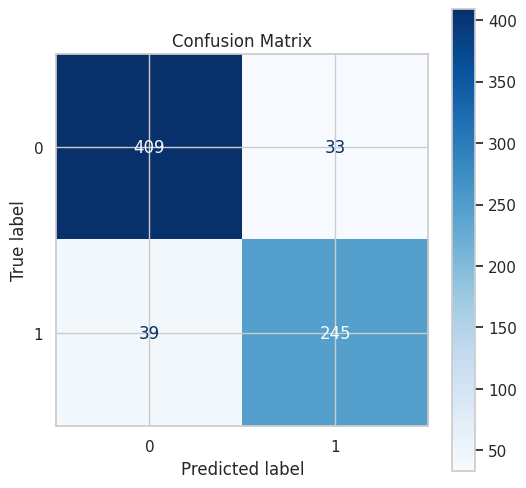

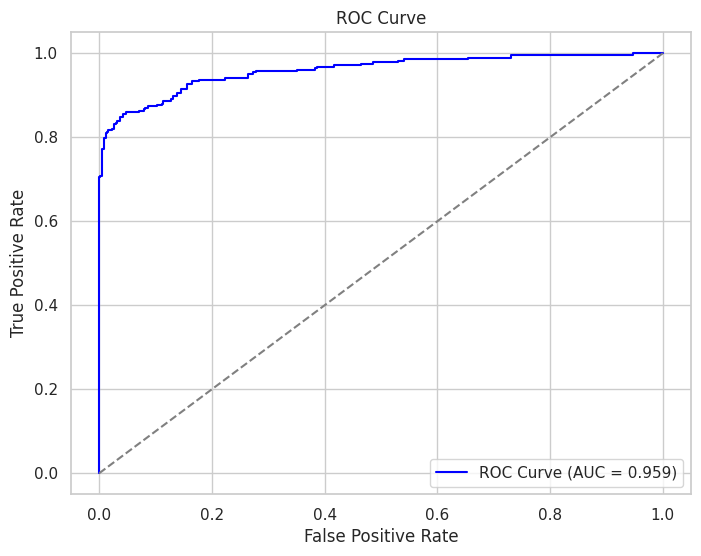

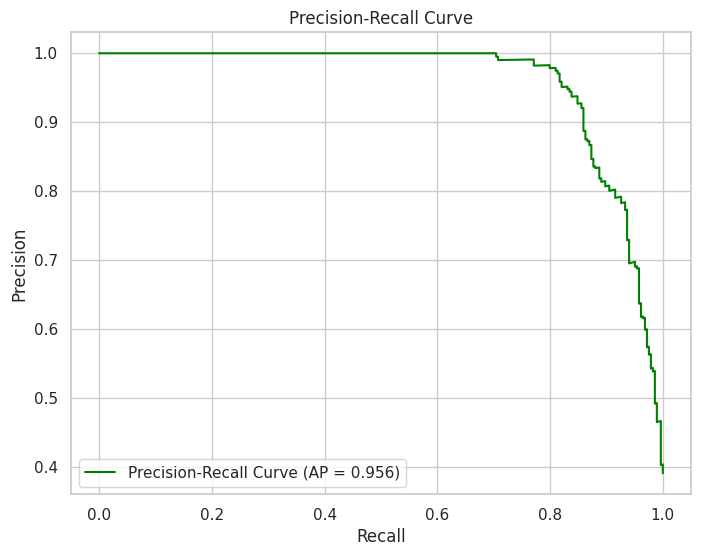

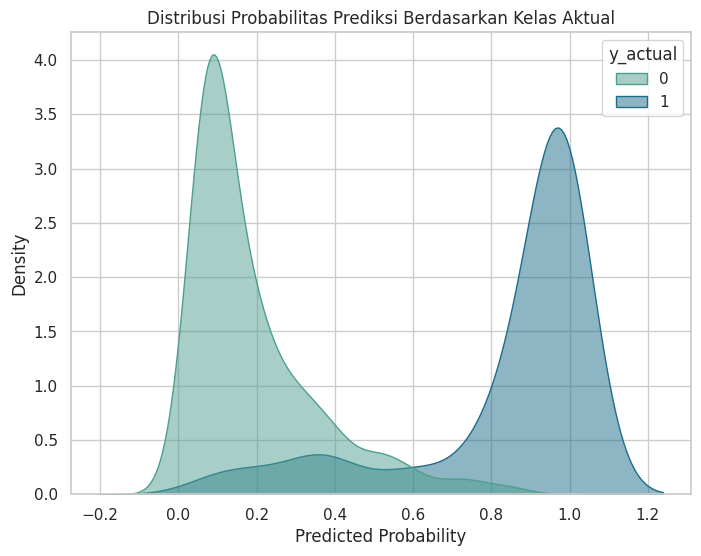

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

def plot_model_testing_results(y_actual, y_pred, y_prob, results_df=None):
    """
    Menampilkan visualisasi hasil testing model: Confusion Matrix, ROC Curve,
    Precision-Recall Curve, dan Distribusi Probabilitas Prediksi per kelas aktual.

    Args:
        y_actual (array-like): Nilai aktual kelas.
        y_pred (array-like): Nilai prediksi kelas (label).
        y_prob (array-like): Probabilitas prediksi kelas positif (float).
        results_df (pd.DataFrame, optional): DataFrame yang berisi minimal kolom
            'y_actual' dan 'y_prob'. Jika disediakan, digunakan untuk plot distribusi.

    Returns:
        None: Menampilkan plot langsung.
    """
    # 1. Confusion Matrix
    cm = confusion_matrix(y_actual, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(6, 6))
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Confusion Matrix')
    plt.show()

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    auc_score = roc_auc_score(y_actual, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_actual, y_prob)
    avg_precision = average_precision_score(y_actual, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.3f})', color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

    # 4. Distribusi Probabilitas Prediksi berdasarkan Kelas Aktual
    if results_df is not None and 'y_actual' in results_df.columns and 'y_prob' in results_df.columns:
        plt.figure(figsize=(8,6))
        sns.kdeplot(data=results_df, x='y_prob', hue='y_actual', fill=True, common_norm=False,
                    palette='crest', alpha=0.5)
        plt.title('Distribusi Probabilitas Prediksi Berdasarkan Kelas Aktual')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Density')
        plt.show()
    else:
        print("Peringatan: 'results_df' tidak diberikan atau tidak memiliki kolom 'y_actual' dan 'y_prob'. Distribusi probabilitas tidak ditampilkan.")

plot_model_testing_results(y_actual, y_pred, y_prob, results_df)


Output evaluasi model menunjukkan beberapa visualisasi dan statistik penting yang menggambarkan performa model pada data uji. Confusion matrix memperlihatkan distribusi prediksi versus label asli, dengan 409 prediksi benar untuk kelas 0 (true negative), 245 prediksi benar untuk kelas 1 (true positive), 33 prediksi salah untuk kelas 0 yang diprediksi sebagai 1 (false positive), dan 39 prediksi salah untuk kelas 1 yang diprediksi sebagai 0 (false negative). Ini menunjukkan model cukup akurat dalam membedakan antara dua kelas tersebut.

ROC Curve menunjukkan kurva Receiver Operating Characteristic yang menggambarkan trade-off antara True Positive Rate (sensitivitas) dan False Positive Rate. Nilai Area Under Curve (AUC) sebesar 0.959 menandakan performa model sangat baik dalam membedakan kelas positif dan negatif, dengan nilai mendekati 1 yang ideal.

Precision-Recall Curve memperlihatkan keseimbangan antara precision dan recall, dengan Average Precision (AP) sekitar 0.956 yang mengindikasikan model sangat efektif dalam mempertahankan presisi saat recall tinggi. Ini sangat penting terutama di kondisi dataset yang imbalance karena mengutamakan hasil prediksi positif yang benar.

Distribusi Probabilitas Prediksi berdasarkan Kelas Aktual menunjukkan dua puncak distribusi probabilitas prediksi yang terpisah dengan baik untuk kelas 0 dan kelas 1. Model memberikan probabilitas tinggi untuk kelas yang benar sehingga terlihat distribusi probabilitas kelas 0 berkumpul pada nilai rendah sedangkan kelas 1 pada nilai tinggi, mengindikasikan model mampu memisahkan kelas dengan baik secara probabilistik.

Secara keseluruhan, output ini menunjukkan bahwa model klasifikasi yang dibangun memiliki akurasi tinggi, kemampuan diskriminasi yang sangat baik (AUC 0.959), serta kinerja yang stabil dalam hal precision dan recall. Visualisasi distribusi probabilitas juga menguatkan bahwa model membuat prediksi dengan keyakinan yang jelas terhadap masing-masing kelas.



In [44]:
import joblib

# Suppose 'best_model' is your trained pipeline (including preprocessor + classifier)
model_filename = 'trained_pipeline.joblib'

# Save the pipeline to a file
joblib.dump(best_model, model_filename)

print(f"Model pipeline saved to '{model_filename}'")


Model pipeline saved to 'trained_pipeline.joblib'


In [50]:
import pkg_resources

# Daftar modul yang ingin dicek versinya
modules = [
    "kagglehub",
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "imbalanced-learn",
    "tqdm",
]

# Fungsi untuk mendapatkan versi modul jika terinstall
def get_version(module_name):
    try:
        dist = pkg_resources.get_distribution(module_name)
        return dist.version
    except pkg_resources.DistributionNotFound:
        return "Module not found"
    except Exception as e:
        return f"Error: {e}"

# Mendapatkan versi tiap modul dan menyimpannya dalam dictionary
module_versions = {mod: get_version(mod) for mod in modules}

# Menampilkan hasil versi modul
for mod, ver in module_versions.items():
    print(f"{mod}=={ver}")


kagglehub==0.3.12
pandas==2.2.3
numpy==1.26.4
matplotlib==3.7.2
seaborn==0.12.2
scikit-learn==1.2.2
imbalanced-learn==0.13.0
tqdm==4.67.1


In [ ]:
# Daftar fitur terbaik yang sudah dipilih
selected_features = ['Course', 'Admission_grade', 'Tuition_fees_up_to_date', 'Age_at_enrollment',
                     'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
                     'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_evaluations',
                     'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']

# Pastikan dataframe asli Anda bernama df (atau df_raw)
df_selected = df[selected_features].copy()

# Simpan hasil seleksi fitur ke file CSV baru
output_file = 'dataset_fitur_terbaik.csv'
df_selected.to_csv(output_file, index=False)

print(f"Dataset dengan fitur terbaik berhasil disimpan ke file: {output_file}")


In [47]:
import pandas as pd
import numpy as np
import random

# Set seed
np.random.seed(42)
random.seed(42)

# Simulasi 100 data
n = 100
data = {
    "Course": np.random.choice([9119, 9130, 9070, 9238, 9071, 9147], size=n),  # Informatics, Management, Tourism, etc.
    "Admission_grade": np.round(np.random.uniform(120, 200, size=n), 2),  # Nilai antara 120 dan 200
    "Tuition_fees_up_to_date": np.random.choice([0, 1], size=n, p=[0.3, 0.7]),  # Mayoritas bayar tepat waktu
    "Age_at_enrollment": np.random.randint(17, 30, size=n),
    "Curricular_units_1st_sem_evaluations": np.random.randint(4, 10, size=n),
    "Curricular_units_1st_sem_approved": lambda x: [random.randint(0, e) for e in x],
    "Curricular_units_1st_sem_grade": np.round(np.random.uniform(8, 19, size=n), 2),
    "Curricular_units_2nd_sem_evaluations": np.random.randint(4, 10, size=n),
    "Curricular_units_2nd_sem_approved": lambda x: [random.randint(0, e) for e in x],
    "Curricular_units_2nd_sem_grade": np.round(np.random.uniform(8, 19, size=n), 2),
}

# Convert to DataFrame
df_test = pd.DataFrame(data)
# Hitung approved berdasarkan evaluations
df_test["Curricular_units_1st_sem_approved"] = df_test["Curricular_units_1st_sem_evaluations"].apply(lambda e: random.randint(0, e))
df_test["Curricular_units_2nd_sem_approved"] = df_test["Curricular_units_2nd_sem_evaluations"].apply(lambda e: random.randint(0, e))

# Simpan ke CSV
df_test.to_csv("dummy_uc_student_performance.csv", index=False)
print("✅ Dummy CSV berhasil dibuat: dummy_uc_student_performance.csv")


✅ Dummy CSV berhasil dibuat: dummy_uc_student_performance.csv


In [49]:
import pandas as pd
import joblib

# ====== 1. Load data ======
data_test = pd.read_csv("/kaggle/working/dummy_uc_student_performance.csv")

# ====== 2. Load trained pipeline (preprocessor + model) ======
pipeline = joblib.load("/kaggle/working/trained_pipeline.joblib")

# ====== 3. Prediksi ======
# (pipeline akan otomatis memproses fitur dan memprediksi)
y_pred = pipeline.predict(data_test)

# ====== 4. Tambahkan hasil prediksi ke dataframe ======
data_test["Prediction"] = y_pred

data_test.sample(10)


,Course,Admission_grade,Tuition_fees_up_to_date,Age_at_enrollment,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Prediction
17,9147,144.88,0,29,8,8,11.90,8,5,12.96,1
6,9070,185.24,0,26,7,2,16.14,5,2,15.03,1
31,9130,122.03,1,26,5,2,18.72,5,4,14.38,0
84,9147,139.16,1,18,6,5,10.78,4,4,9.15,1
94,9238,170.58,1,22,4,0,18.07,5,5,11.91,1
92,9130,178.26,0,23,5,3,12.23,6,6,11.77,1
15,9238,146.47,1,25,5,1,18.54,4,4,15.99,1
85,9238,131.59,1,22,8,8,15.65,5,1,16.11,0
27,9119,181.68,1,23,7,0,18.41,5,4,8.50,1
28,9119,159.50,1,22,5,1,16.59,6,0,14.83,1
